# 21기 KNN 정규세션 과제

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [1]:
#드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Tobigs/week_5 KNN&Clustering, SVM/KNN&Clustering/과제/KNN/blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1. Preprocssing / EDA

###EDA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [10]:
#범주형 수치형 나누기

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_cols, numerical_cols

(['Product_ID',
  'Gender',
  'Age',
  'City_Category',
  'Stay_In_Current_City_Years'],
 ['User_ID',
  'Occupation',
  'Marital_Status',
  'Product_Category_1',
  'Product_Category_2',
  'Product_Category_3',
  'Purchase'])

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [7]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

<Axes: >

<Figure size 600x300 with 0 Axes>

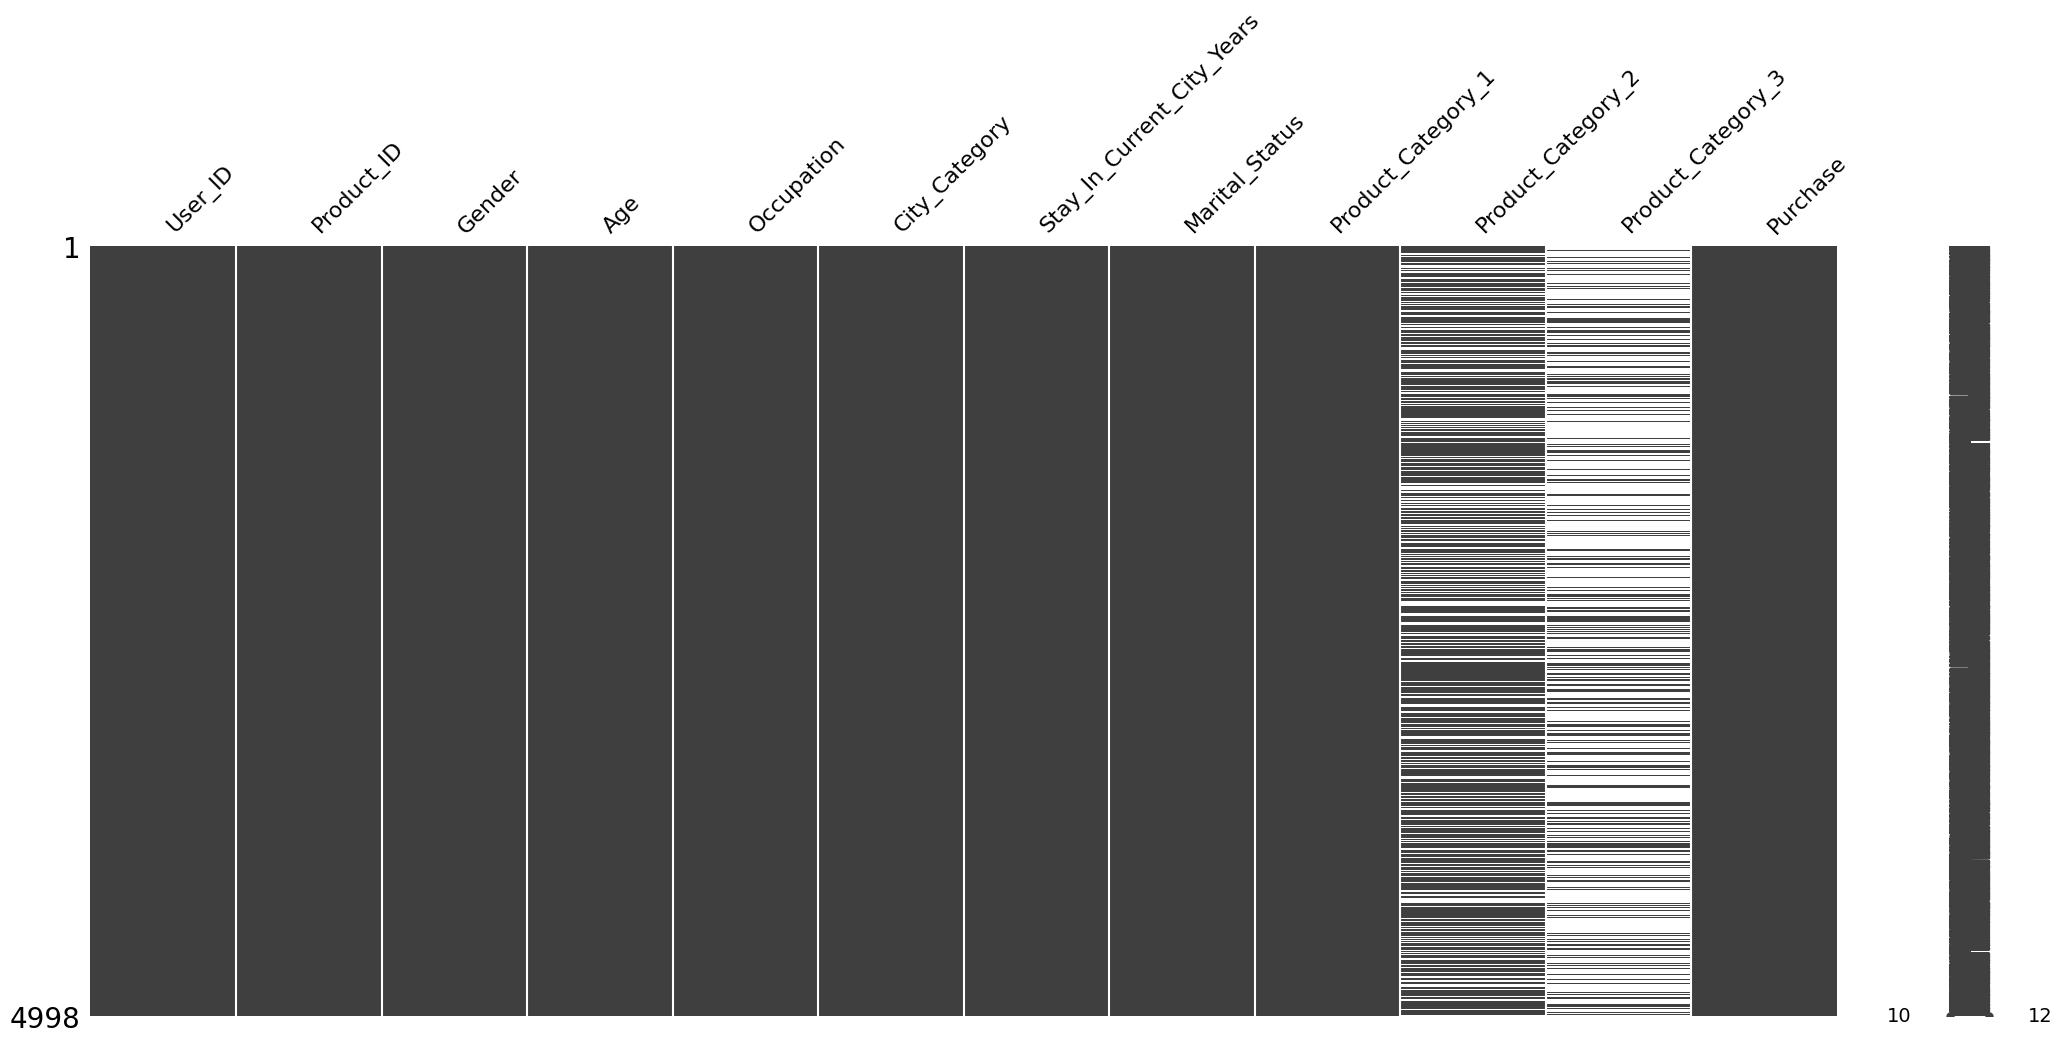

In [8]:
import missingno as msno
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
msno.matrix(df) #변수간 결측 분포

<Axes: xlabel='count', ylabel='Gender'>

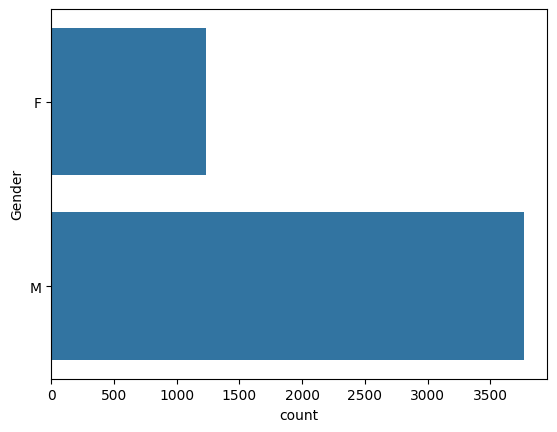

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df['Gender'])

<Axes: xlabel='count', ylabel='Age'>

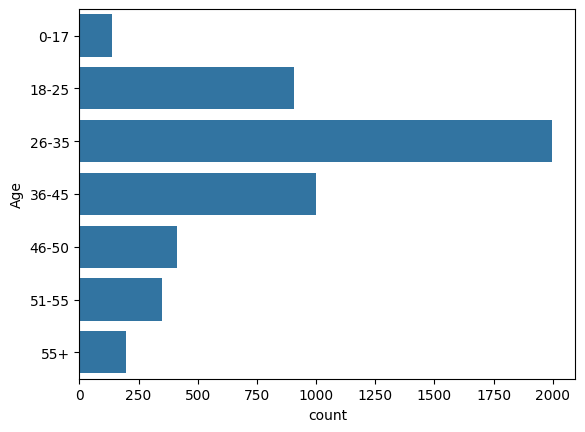

In [14]:
sns.countplot(df['Age'])

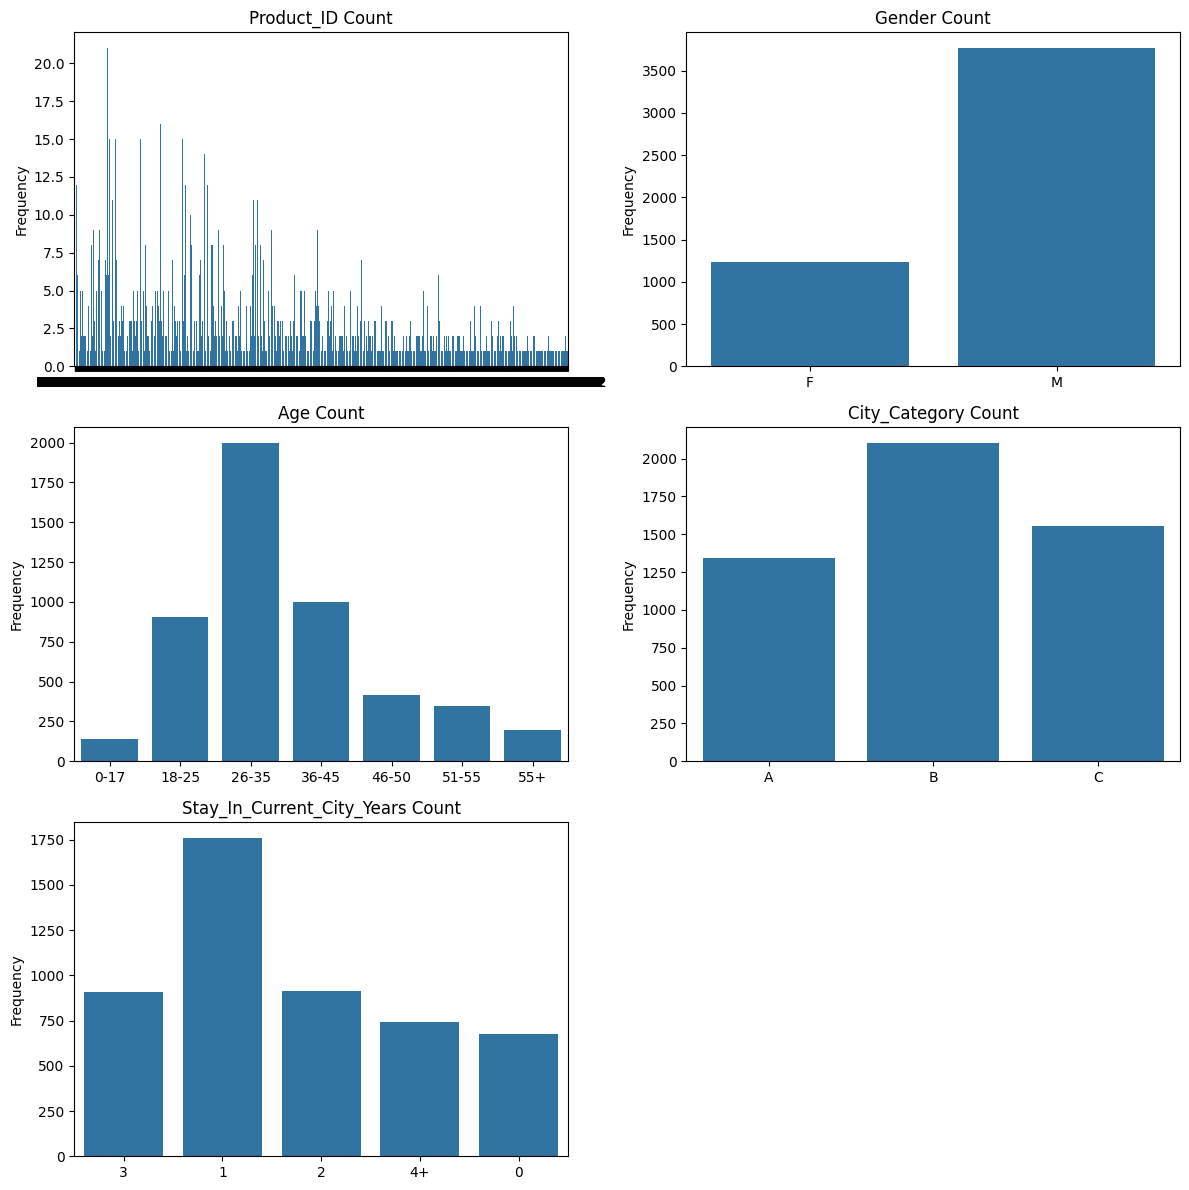

In [15]:
# 서브플롯의 행과 열의 수 계산
n_cols = 2  # 한 행에 표시할 서브플롯의 수
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # 필요한 행의 수

# 서브플롯 생성
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))

# 모든 범주형 변수를 순회하며 빈도수 시각화
for i, var in enumerate(categorical_cols):
    row = i // n_cols
    col = i % n_cols
    if n_rows > 1:
        ax = axes[row, col]
    else:
        ax = axes[col]
    sns.countplot(x=var, data=df, ax=ax)
    ax.set_title(f'{var} Count')
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

# 빈 서브플롯 숨기기
for j in range(i+1, n_rows*n_cols):
    row = j // n_cols
    col = j % n_cols
    if n_rows > 1:
        axes[row, col].set_visible(False)
    else:
        axes[col].set_visible(False)

plt.tight_layout()
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

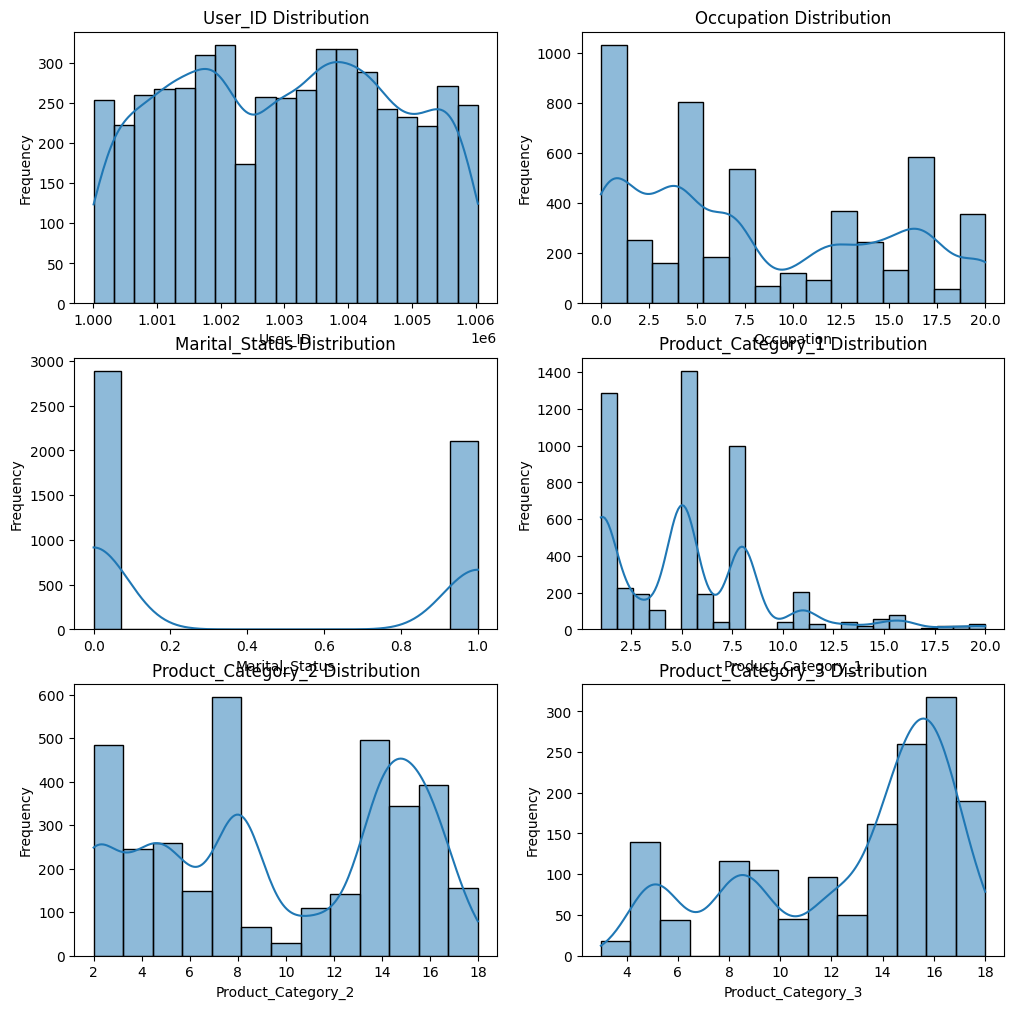

In [16]:
# 서브플롯 생성
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))

# 모든 수치형 변수에 대해 히스토그램 생성
for i, var in enumerate(numerical_cols):
    row = i // n_cols
    col = i % n_cols
    if n_rows > 1:
        ax = axes[row, col]
    else:
        ax = axes[col]
    sns.histplot(df[var], kde=True, ax=ax)  # KDE(Kernel Density Estimate)를 포함한 히스토그램
    ax.set_title(f'{var} Distribution')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# 빈 서브플롯 숨기기
for j in range(i+1, n_rows*n_cols):
    row = j // n_cols
    col = j % n_cols
    if n_rows > 1:
        axes[row, col].set_visible(False)
    else:
        axes[col].set_visible(False)

plt.tight_layout()
plt.show()

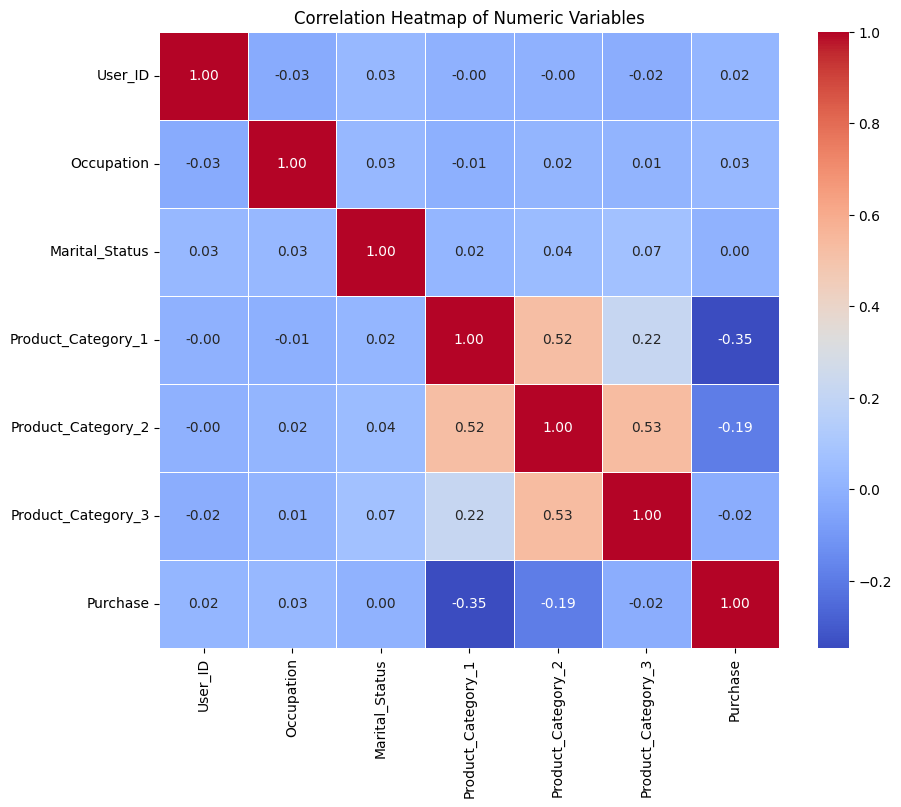

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 상관관계 매트릭스 계산
numeric_data = df[['User_ID',
  'Occupation',
  'Marital_Status',
  'Product_Category_1',
  'Product_Category_2',
  'Product_Category_3',
  'Purchase']]

correlation_matrix = numeric_data.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

## 2. KNN 구현 & 파라미터 튜닝, evaluation


In [20]:
df = df.fillna(0)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          4998 non-null   float64
 10  Product_Category_3          4998 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [26]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 초기화
label_encoder = LabelEncoder()

# object 타입을 가진 열에 대해 레이블 인코딩 적용
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

   User_ID  Product_ID  Gender  Age  Occupation  City_Category  \
0  1001088         223       0    9          10              0   
1  1004493        1659       0    9          10              0   
2  1005302         236       0    9          10              0   
3  1001348         683       0    9          10              0   
4  1001348         466       0    9          10              0   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                           3               0                   5   
1                           1               0                   7   
2                           1               0                   1   
3                           3               0                   2   
4                           3               0                   3   

   Product_Category_2  Product_Category_3  Purchase  
0                17.0                 0.0      2010  
1                 0.0                 0.0      4483  
2                 4.0     

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 타겟 변수와 특성 변수 분리
X = df[['Age', 'Occupation', 'Product_Category_1', 'Gender', 'City_Category', 'Stay_In_Current_City_Years']]  # 예시 변수
y = df['Purchase']  # 타겟 변수


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN 회귀 모델 생성 및 훈련
knn_regressor = KNeighborsRegressor(n_neighbors=5)   #파라미터 튜닝
knn_regressor.fit(X_train_scaled, y_train)

# 예측 및 성능 평가
y_pred = knn_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 18424589.065
RMSE: 4292.387338649671
